In [8]:
# 1. Open the link: [Dogs vs Cats Dataset on Kaggle](https://www.kaggle.com/datasets/salader/dogs-vs-cats).
# 2. Click on your profile picture in the top-right corner.
# 3. Select Settings from the dropdown menu.
# 4. Scroll down to API section.
# 5. Click on Create New Token.
# 6. A file named `kaggle.json` will be downloaded.
# 7. Upload the `kaggle.json` file to Google Colab.

In [9]:
# Create a directory for kaggle configuration file if it doesn't exist
!mkdir -p ~/.kaggle

#Copy the kaggle API token file (kaggle.json) to the config directory
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [10]:
#Download the 'dog-vs-cats' dataset from kaggle.
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
import zipfile

#Open the 'dog-vs-cats.zip' file in read mode
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')

#Extract all contents of the ZIP file to the '/content' directory.
zip_ref.extractall('/content')

#Close the ZIP file to release resources
zip_ref.close()

In [12]:
import tensorflow as tf
from tensorflow import keras

#Import Sequential for creation a linear stack of layers
from keras import Sequential

#Import Dense (full connected), Conv2D (convolutional), MaxPolling2D (Pooling), and Flatten (dimensionality redution) layers for model design
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [13]:
#Refer to the keras documentation on data Loading from more details: https://keras.io/api/data_loading/

train_ds =  keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

validation_ds =  keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [15]:
#Normalize
#Normlize image by scaling pixel values to the renge[0,1] (by dividing by 255)
#Define a function 'process' to apply normalization to each image in the dataset.
#Apply the 'process' function to both traning and validation datasets using the 'map' method.

#  def proceess(image,label):
#   image = tf.cast(image/255. ,tf.float32)
#   return image,label

#   train_ds = train_ds.map(process)
#   validation_ds = validation_ds.map(process)

def process(image, label):
    # Normalize the image to the range [0, 1] and cast to float32
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

# Apply the `process` function to both training and validation datasets
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [16]:
#Create CNN model
#Create a Convolution Neural Network (CNN) model using the Sequential API
model = Sequential()

#Add a series of Conv2D layers with ReLU activation followed by MaxPooling2D Layeers
model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))


model.add(Conv2D(62,kernel_size = (3,3),padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(128,kernel_size = (3,3),padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

#Convert 2D data into a 1D array for dense layers to process
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(62,activation='relu'))

#Produces a sigle probability score for binary classification (e.g., yes/no)
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 62)        │          17,918 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 62)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          71,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 62)                  │           7,998 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              63 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,844,155 (56.63 MB)

 Trainable params: 14,844,155 (56.63 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 78ms/step - accuracy: 0.5621 - loss: 0.7073 - val_accuracy: 0.7092 - val_loss: 0.5635
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 72ms/step - accuracy: 0.7213 - loss: 0.5522 - val_accuracy: 0.7726 - val_loss: 0.4782
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 79ms/step - accuracy: 0.8042 - loss: 0.4242 - val_accuracy: 0.8048 - val_loss: 0.4550
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 74ms/step - accuracy: 0.8684 - loss: 0.2992 - val_accuracy: 0.8060 - val_loss: 0.5657
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 77ms/step - accuracy: 0.9341 - loss: 0.1688 - val_accuracy: 0.8002 - val_loss: 0.7863
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.9631 - loss: 0.0989 - val_accuracy: 0.7774 - val_loss: 0.9192
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.9764 - loss: 0.0693 - val_accuracy: 0.7776 - val_loss: 1.0270
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 83ms/step - accuracy: 0.9790 - loss: 0.0622 - 

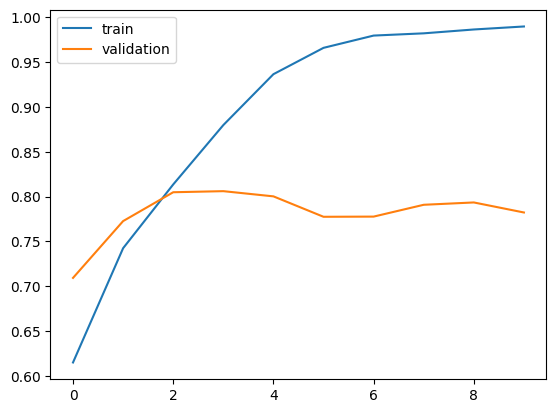

In [20]:
#Plot model traning and validation accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label = 'train')
plt.plot(history.history['val_accuracy'], label = 'validation')

#Add legend to distinguish between train and validation accuracy
plt.legend()
plt.show()

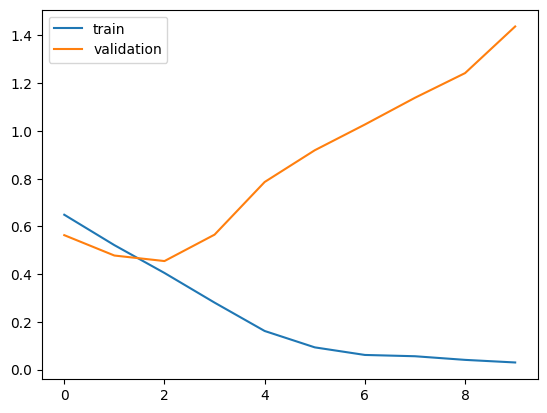

In [21]:
#Plot model training and validation loss over epochs
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

In [22]:
import cv2
import matplotlib.pyplot as plt

In [29]:
test_img = cv2.imread('/content/cat.jpg')

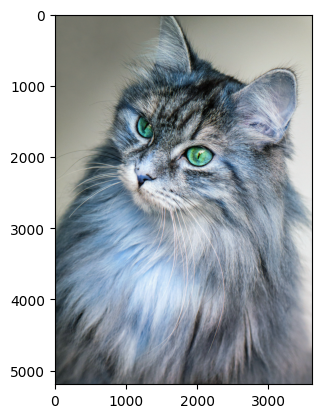

In [30]:
plt.imshow(test_img)

In [31]:
test_img.shape

(5192, 3608, 3)

In [32]:
test_img = cv2.resize(test_img,(256,256))

In [33]:
test_input = test_img.reshape((1,256,256,3))

In [34]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.]], dtype=float32)